# Выбор локации для скважины

**Описание проекта**


Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.


 **Цель исследования:**

Построить линейную модель, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

**Ход исследования**

Для задачи данные будут получены из:
 - Первый регион:
    `/datasets/geo_data_0.csv`
 - Второй регион:
    `/datasets/geo_data_1.csv`
 - Третий регион:
    `/datasets/geo_data_2.csv`
    

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского и статического анализа. Основным этапом послужит разработка ML-модели, оценка результатов обучения. Заключительным этапом послужит расчет прибыли и подведение итогов.


***Содержание***

 - [Загрузка и подготовка данных](#section1)
 - [Обучение и проверка модели](#section2)
 - [Подготовка к расчету прибыли](#section3)
 - [Расчет прибыли и рисков](#section4)
 - [Общий вывод](#section5)
 

<a id="section1"></a>
## Загрузка и подготовка данных

### Установка модулей и импорт библиотек

In [1]:
!pip install phik -q

In [2]:
!pip install scikit-learn==1.1.3 -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from phik import phik_matrix 
from phik.report import plot_correlation_matrix

#отключение ограничений вывода графиков по высоте
from IPython.display import display, HTML
display(HTML("<style>.output_wrapper, .output {height:auto !important;}</style>"))


### Загрузка датасетов

In [4]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except Exception:
    print(f'Ошибка при загрузке датасета(-ов)')

### Обзор датасетов

**Датасет geo_data_0**

In [5]:
data_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [6]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Датасет geo_data_1**

In [7]:
data_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Датасет geo_data_2**

In [9]:
data_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Обработка дубликатов 

**Явные дубликаты**

In [11]:
print(data_0.duplicated().sum())
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())

0
0
0


**Неявные дубликаты**

In [12]:
datas = [data_0, data_1, data_2]


for data in datas:
    display(data[data.duplicated(subset='id', keep=False)].sort_values(by='id'))
    count = data.duplicated(subset=['id'], keep=False).sum()
    print(f'Процент дубликатов: {count / len(data) * 100} %')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Процент дубликатов: 0.02 %


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


Процент дубликатов: 0.008 %


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Процент дубликатов: 0.008 %


Имеются строки с одинаковыми ID скважин, но с разными значениями по показателям. Убедиться в том, в какой строчке верные значения не представляется возможным. Так как таких строк от общего количества в датасетах регионов <0.01%, то их можно удалить.

In [13]:
for data in datas:
    data.drop_duplicates(subset=['id'], keep=False, inplace=True)
    count = data.duplicated(subset=['id'], keep=False).sum()
    print(f'Кол-во дубликатов: {count}, размерность датасета: {data.shape[0]}')

Кол-во дубликатов: 0, размерность датасета: 99980
Кол-во дубликатов: 0, размерность датасета: 99992
Кол-во дубликатов: 0, размерность датасета: 99992


### Исследовательский анализ данных

**Основные метрики**

In [14]:
def describe_data(df):
    display(df.describe())

**Графики для количественных признаков**

In [15]:
def plot_distributions(df, numeric_columns, discrete_columns=[]):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        if col in discrete_columns:
            sns.countplot(x=df[col], ax=axes[0])
            axes[0].set_title(f'Распределение {col}')
        else:
            sns.histplot(df[col], kde=True, ax=axes[0])
            axes[0].set_title(f'Распределение {col}')

        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Боксплот {col}')
        
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Частота')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Значение')

        plt.show()

**Проверка на выбросы**

In [16]:
def check_outliers_iqr(df, numeric_columns):
    outliers = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outliers_count
    print("Количество выбросов по признакам:")
    print(outliers)

***Анализ data_0***

,f0,f1,f2,product
count,99980.000000,99980.000000,99980.000000,99980.000000
mean,0.500447,0.250147,2.502638,92.499166
std,0.871879,0.504431,3.248056,44.289044
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072674,-0.200869,0.288010,56.496513
50%,0.502374,0.250252,2.516005,91.847928
75%,1.073692,0.700646,4.714884,128.564089
max,2.362331,1.343769,16.003790,185.364347


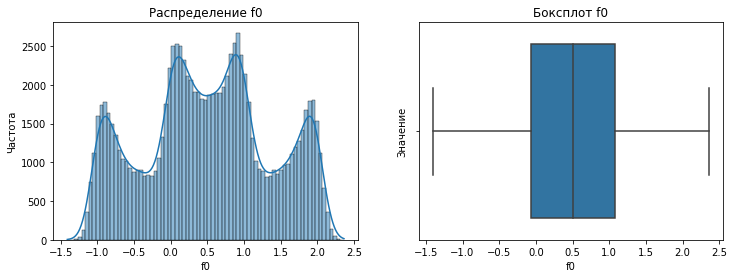

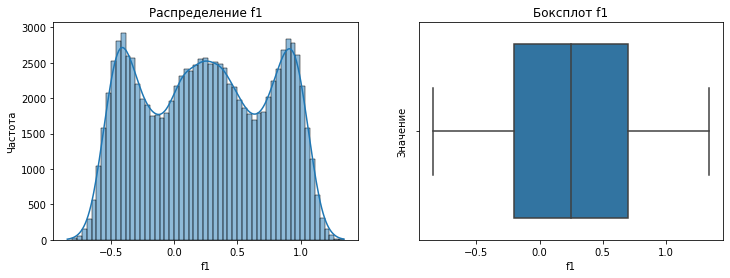

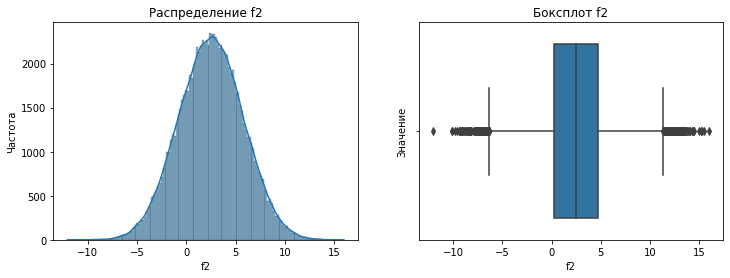

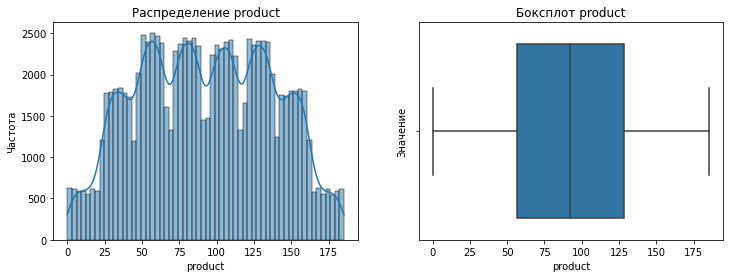

Количество выбросов по признакам:
{'f0': 0, 'f1': 0, 'f2': 507, 'product': 0}


In [17]:
num_cols = data_0.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

describe_data(data_0.drop(columns='id'))
plot_distributions(data_0, num_cols)
check_outliers_iqr(data_0, num_cols)

***Анализ data_1***

,f0,f1,f2,product
count,99992.000000,99992.000000,99992.000000,99992.000000
mean,1.141363,-4.796522,2.494511,68.824148
std,8.965805,5.119934,1.703587,45.944889
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298525,-8.267985,1.000021,26.953261
50%,1.153190,-4.813005,2.011475,57.085625
75%,8.620964,-1.332704,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


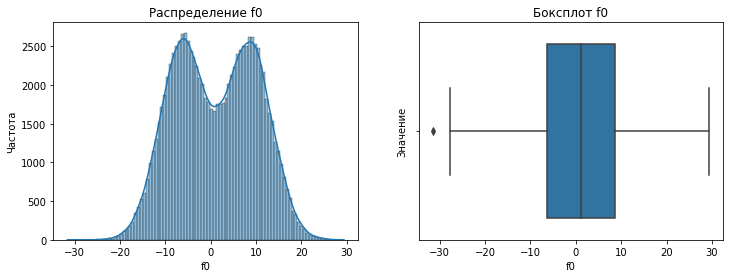

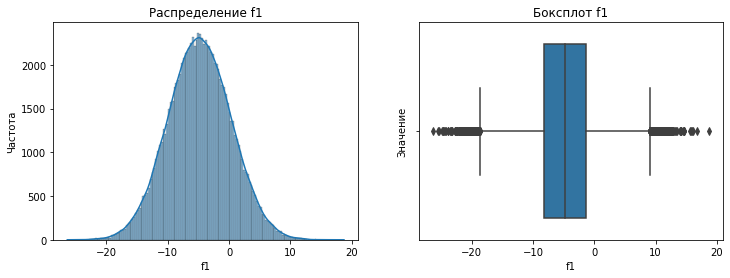

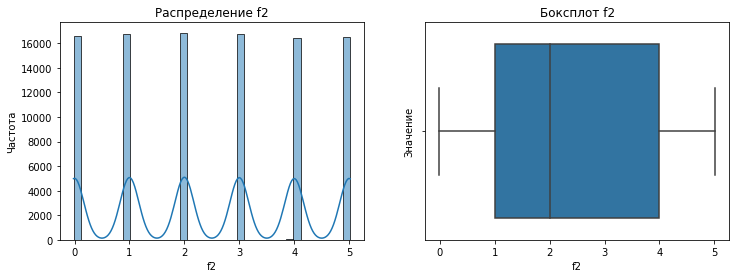

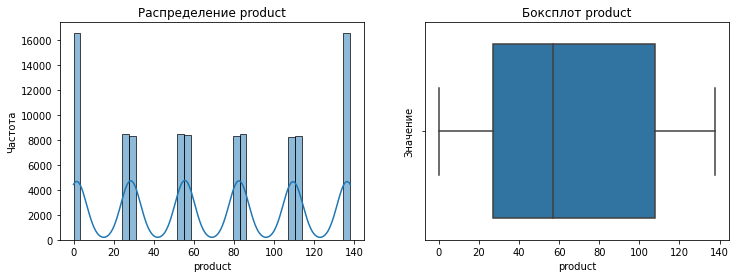

Количество выбросов по признакам:
{'f0': 1, 'f1': 636, 'f2': 0, 'product': 0}


In [18]:
num_cols = data_1.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

describe_data(data_1.drop(columns='id'))
plot_distributions(data_1, num_cols)
check_outliers_iqr(data_1, num_cols)

***Анализ data_2***

,f0,f1,f2,product
count,99992.000000,99992.000000,99992.000000,99992.000000
mean,0.001975,-0.002113,2.495088,94.998767
std,1.732061,1.730404,3.473491,44.747763
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174820,0.130269,59.450441
50%,0.009411,-0.009580,2.484236,94.925026
75%,1.158442,1.163592,4.858662,130.585544
max,7.238262,7.844801,16.739402,190.029838


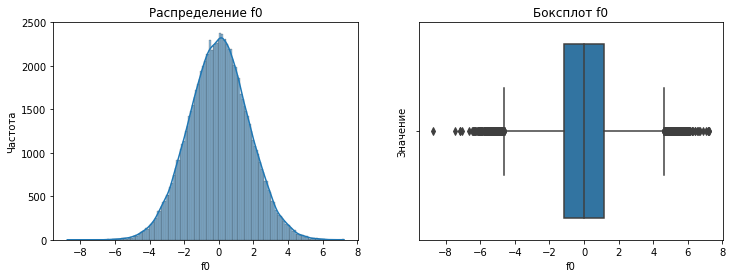

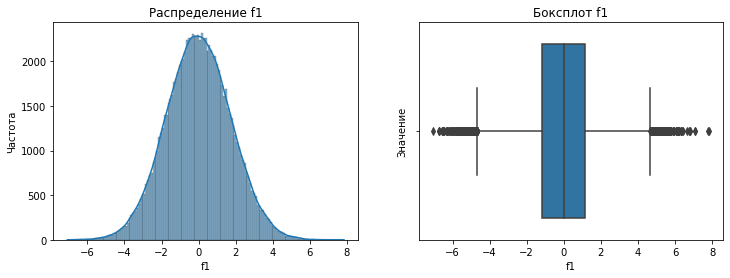

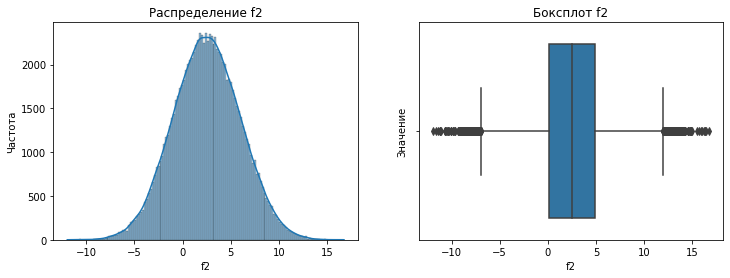

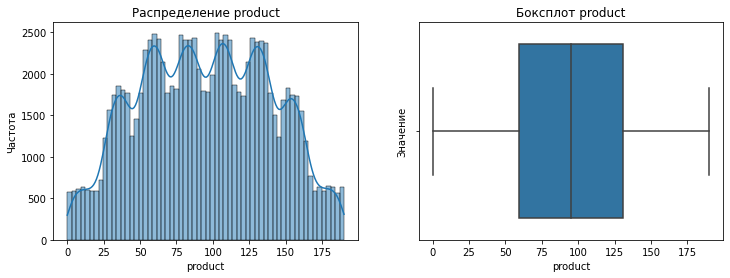

Количество выбросов по признакам:
{'f0': 733, 'f1': 684, 'f2': 584, 'product': 0}


In [19]:
num_cols = data_2.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

describe_data(data_2.drop(columns='id'))
plot_distributions(data_2, num_cols)
check_outliers_iqr(data_2, num_cols)

### Корреляционный анализ

In [20]:
def matrix(data, inter_cols):

    phik_overview = phik_matrix(data.drop(columns=['id']), interval_cols=inter_cols) 

    plot_correlation_matrix(
        phik_overview.values,
        x_labels=phik_overview.columns,
        y_labels=phik_overview.index,
        vmin=0, vmax=1, color_map='Greens',
        title=r'correlation $\phi_K$',
        fontsize_factor=1.5,
        figsize=(20, 15)
    ) 

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable f2 is large: 99992. Are you sure this is not an interval variable? Analysis for pairs of variables including f2 can be slow.
  warnings.warn(


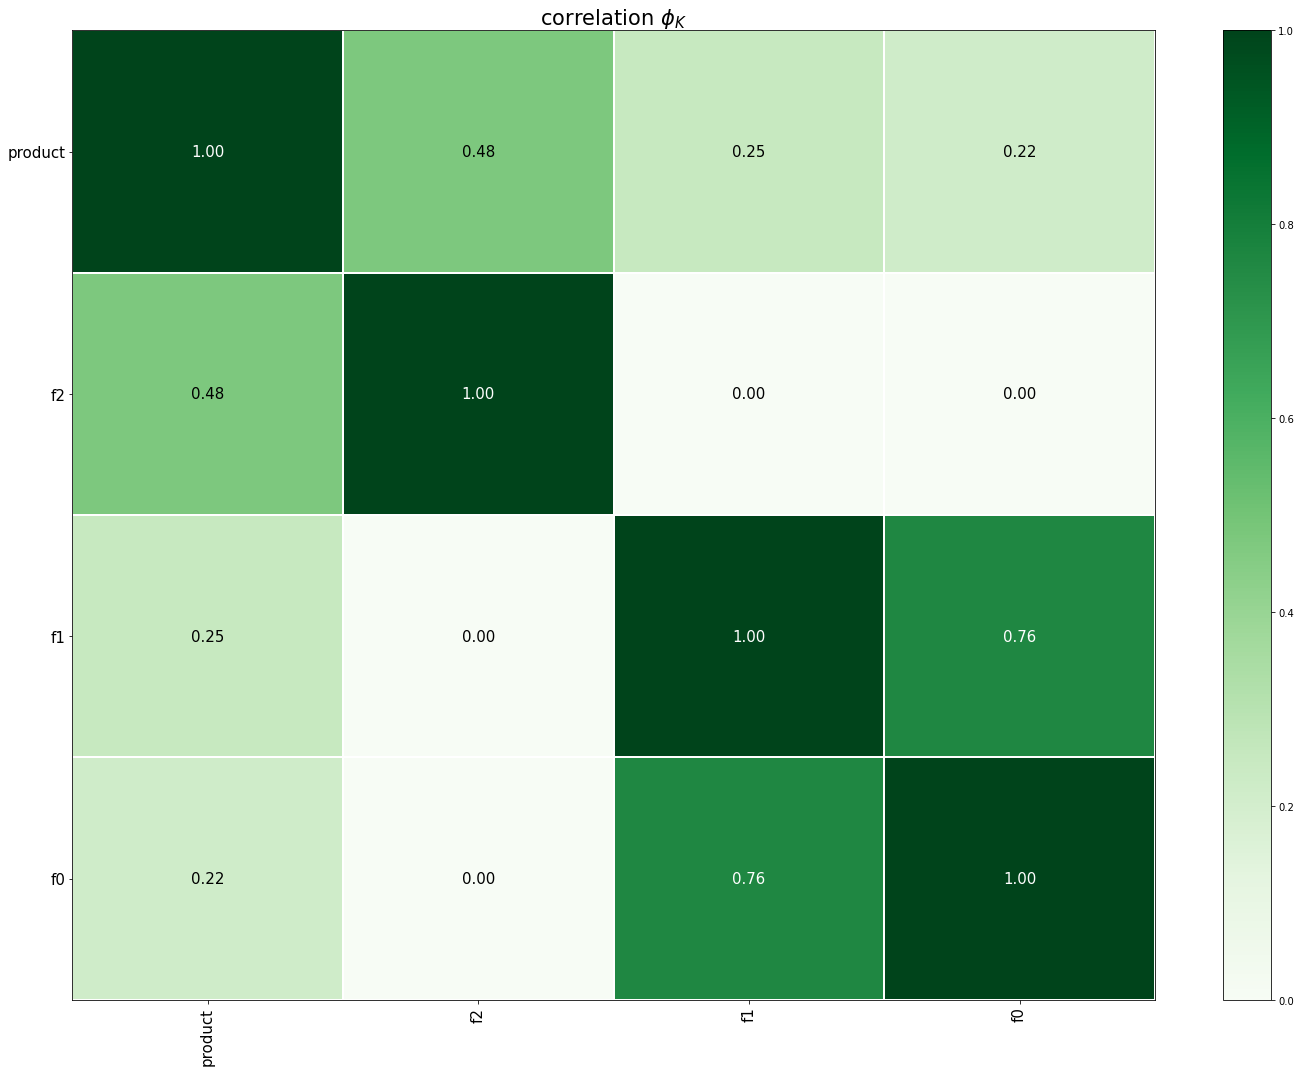

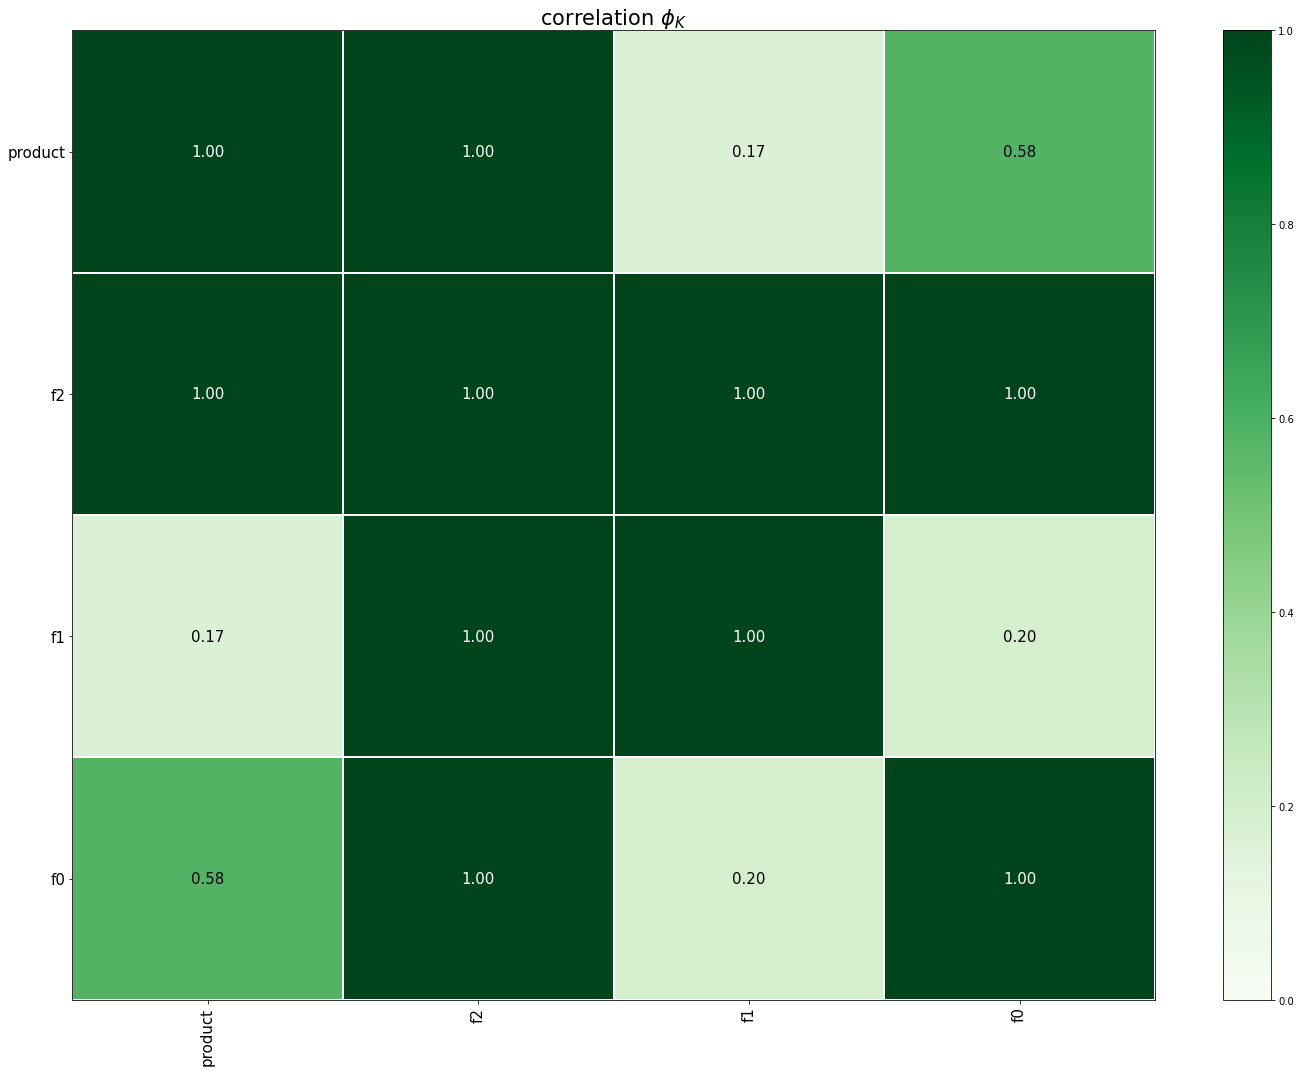

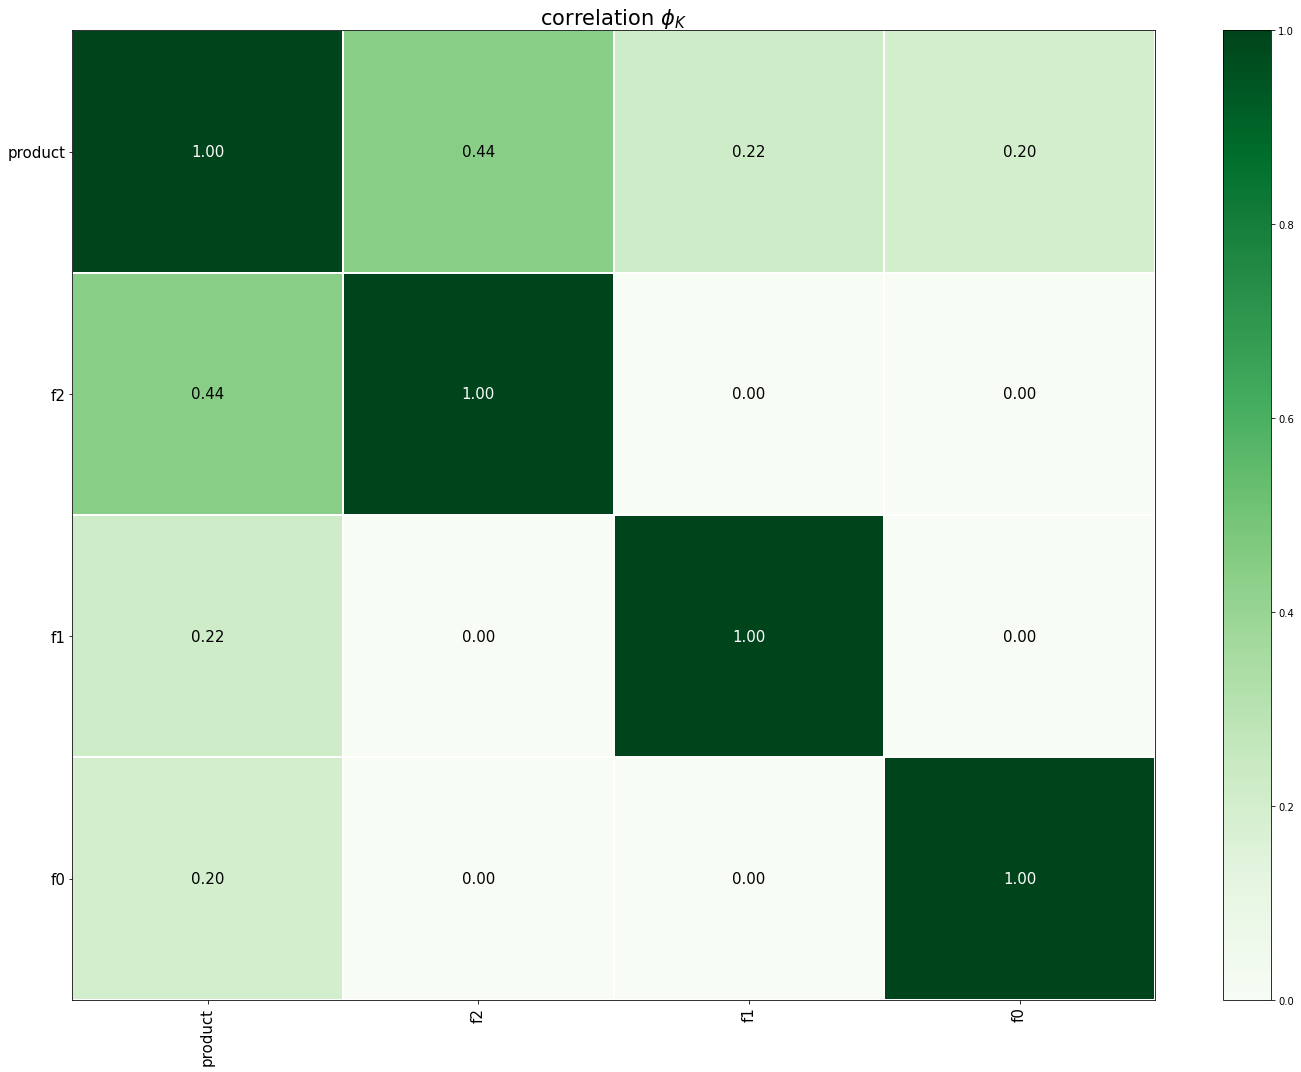

In [21]:
inter_cols_data_0 = ['f0', 'f1', 'f2', 'product']
inter_cols_data_1 = ['f0', 'f1']
inter_cols_data_2 = ['f0', 'f1', 'f2', 'product']

matrix(data_0, inter_cols_data_0)
matrix(data_1, inter_cols_data_1)
matrix(data_2, inter_cols_data_2)

### Промежуточный вывод

**На основе выполнения первого шага можно сделать следующие выводы:**
 - выполенен импорт необходимых библиотек
 - датасеты 3-х регионов успешно загружены
 - обзор датасетов показал, что пропущенные значения отсутствуют, типы данных соответствуют значениям
 - было обнаружено наличие строк с одинаковыми ID скажин, но разными значениями в показателях - принято решение удаления таких строк
 - исследовательский анализ данных показал нормальное распределение данных, показатели `f2` и `product` во втором регионе имеют категориальные значения
 - корреляционный анализ показал наличие (утечки целевого признака?) во втором регионе - `f2` и `product` - 1.0, но так как данные синтетические и нет возможности понять, за что отвечают те или иные показатели, оставим все как есть

<a id="section2"></a>
## Обучение и проверка модели

### Обучение и проверка модели для каждого региона

In [22]:
def train_region_model(data, region_number):
    print(f"\n=== Регион {region_number} ===")
    
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        features, target, test_size=0.25, random_state=42
    )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_valid)
    
    mean_pred = predictions.mean()
    
    mean_actual = y_valid.mean()
    
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    
    print(f"Средний предсказанный запас сырья: {mean_pred:.2f} тыс. баррелей")
    print(f"Средний целевой запас сырья: {mean_actual:.2f} тыс. баррелей")
    print(f"RMSE модели: {rmse:.2f}")
    
    results = pd.DataFrame({'actual': y_valid.reset_index(drop=True),
                            'predicted': predictions})
    
    return results, model



### Получение предсказаний

In [23]:
results_0, model_0 = train_region_model(data_0, 1)
results_1, model_1 = train_region_model(data_1, 2)
results_2, model_2 = train_region_model(data_2, 3)


=== Регион 1 ===
Средний предсказанный запас сырья: 92.29 тыс. баррелей
Средний целевой запас сырья: 92.37 тыс. баррелей
RMSE модели: 37.76

=== Регион 2 ===
Средний предсказанный запас сырья: 69.17 тыс. баррелей
Средний целевой запас сырья: 69.16 тыс. баррелей
RMSE модели: 0.89

=== Регион 3 ===
Средний предсказанный запас сырья: 94.82 тыс. баррелей
Средний целевой запас сырья: 95.06 тыс. баррелей
RMSE модели: 40.13


### Анализ результатов

**Регион 1**

 - Средний предсказанный объём: 92.29 тыс. баррелей

 - RMSE: 37.76

Вывод: Модель работает средне — RMSE высокое, предсказания могут сильно отклоняться от реальных значений.

**Регион 2**

 - Средний предсказанный объём: 69.17 тыс. баррелей

 - RMSE: 0.89

Вывод: Это лучшая модель по точности. RMSE очень низкое — модель точно предсказывает объёмы.
Но средний запас ниже, чем в других регионах.

**Регион 3**

 - Средний предсказанный объём: 94.82 тыс. баррелей

 - RMSE: 40.13

Вывод: Самый высокий предсказанный объём, но и самая высокая ошибка. Модель неточная.

### Промежуточные результаты

 - Создана функция, модели успешно обучены для всех трёх регионов

 - Регион 2 показывает наивысшую точность предсказаний, но с наименьшим средним запасом

 - Регионы 1 и 3 выглядят более перспективными по объёмам сырья, но модели в них менее надёжны

 - Из-за отсутствия расшифровки признаков f0, f1, f2, возможности по улучшению моделей ограничены

<a id="section3"></a>
## Подготовка к расчёту прибыли

### Сохранение ключевых значений

Переменные пишем большими буквами, так как это константы, в процессе рассчетов они не изменяются

In [24]:
BUDGET = 10_000_000_000  # Бюджет на разработку региона, рублей
BARREL_REVENUE = 450_000  # Доход с 1 тыс. баррелей, рублей
NUM_WELLS = 200  # Количество скважин для разработки
TOTAL_WELLS = 500  # Количество скважин для исследования

### Расчёт минимального объёма сырья для безубыточности

In [25]:
min_volume = BUDGET / (NUM_WELLS * BARREL_REVENUE)
print(f"Минимальный необходимый объём на одну скважину: {min_volume:.2f} тыс. баррелей")

Минимальный необходимый объём на одну скважину: 111.11 тыс. баррелей


**Сравнение с фактическими средними предсказанными объёмами**

Регион 1 - 92.29 тыс. баррелей

Регион 2 - 69.17 тыс. баррелей

Регион 3 - 94.82 тыс. баррелей

In [26]:
mean_pred_0 = 92.29  
mean_pred_1 = 69.17 
mean_pred_2 = 94.82 

mean_actual_0 = results_0['actual'].mean() 
mean_actual_1 = results_1['actual'].mean() 
mean_actual_2 = results_2['actual'].mean()


print("\nСравнение с фактическими средними объёмами:")
print(f"Регион 1:")
print(f"  Средний предсказанный запас: {mean_pred_0:.2f} тыс. баррелей")
print(f"  Средний реальный запас: {mean_actual_0:.2f} тыс. баррелей")
print(f"Регион 2:")
print(f"  Средний предсказанный запас: {mean_pred_1:.2f} тыс. баррелей")
print(f"  Средний реальный запас: {mean_actual_1:.2f} тыс. баррелей")
print(f"Регион 3:")
print(f"  Средний предсказанный запас: {mean_pred_2:.2f} тыс. баррелей")
print(f"  Средний реальный запас: {mean_actual_2:.2f} тыс. баррелей")


Сравнение с фактическими средними объёмами:
Регион 1:
  Средний предсказанный запас: 92.29 тыс. баррелей
  Средний реальный запас: 92.37 тыс. баррелей
Регион 2:
  Средний предсказанный запас: 69.17 тыс. баррелей
  Средний реальный запас: 69.16 тыс. баррелей
Регион 3:
  Средний предсказанный запас: 94.82 тыс. баррелей
  Средний реальный запас: 95.06 тыс. баррелей


### Промежуточный вывод

 - Чтобы проект не ушёл в убыток, каждая скважина должна дать минимум ~111.1 тыс. баррелей.

 - Средний целевойй запас в каждом регионе:

   - Регион 0: 92.37 тыс. баррелей

   - Регион 1: 69.16 тыс. баррелей

   - Регион 2: 95.06 тыс. баррелей

 - Во всех трёх регионах средний фактический объём ниже порогового значения, что указывает на высокий риск убытков, если выбирать скважины случайно.

 - Однако в следующих шагах мы будем выбирать только 200 лучших скважин из 500 по предсказанному запасу — это может значительно повысить среднюю прибыль и снизить риск.

<a id="section4"></a>
## Расчёт прибыли и рисков 

### Функция расчета прибыли

Функция рассчитывает прибыль по датафрейму с реальными и предсказанными значениями.

In [27]:
def calculate_profit(results_df, budget, barrel_revenue, num_wells):

    top_200 = results_df.sort_values(by='predicted', ascending=False).head(num_wells)
    
    total_volume = top_200['actual'].sum()
    
    revenue = total_volume * barrel_revenue
    
    profit = revenue - budget
    return profit

### Получение результатов

In [28]:
profit_0 = calculate_profit(results_0, BUDGET, BARREL_REVENUE, NUM_WELLS)
profit_1 = calculate_profit(results_1, BUDGET, BARREL_REVENUE, NUM_WELLS)
profit_2 = calculate_profit(results_2, BUDGET, BARREL_REVENUE, NUM_WELLS)

print(f'Прибыль региона 1: {profit_0:,.2f} руб.')
print(f'Прибыль региона 2: {profit_1:,.2f} руб.')
print(f'Прибыль региона 3: {profit_2:,.2f} руб.')

Прибыль региона 1: 3,301,821,343.65 руб.
Прибыль региона 2: 2,415,086,696.68 руб.
Прибыль региона 3: 2,103,914,701.30 руб.


**Вывод:** Регион 1 показывает наибольшую прибыль по результатам отбора 200 лучших скважин.

###  Применение техники Bootstrap

Функция возвращает массив прибыли по 1000 случайным выборкам Bootstrap.

In [29]:
def bootstrap_profit(results_df, budget, barrel_revenue, total_wells, num_wells, n_bootstrap=1000):
    profits = []
    state = np.random.RandomState(42)
    
    for _ in range(n_bootstrap):
        sample = results_df.sample(n=total_wells, replace=True, random_state=state)
        
        profit = calculate_profit(sample, budget, barrel_revenue, num_wells)
        profits.append(profit)
    
    return profits

In [30]:
state_0 = bootstrap_profit(results_0, BUDGET, BARREL_REVENUE, TOTAL_WELLS, NUM_WELLS)
state_1 = bootstrap_profit(results_1, BUDGET, BARREL_REVENUE, TOTAL_WELLS, NUM_WELLS)
state_2 = bootstrap_profit(results_2, BUDGET, BARREL_REVENUE, TOTAL_WELLS, NUM_WELLS)

### Нахождение средней прибыли, 95%-й доверительный интервал и риск убытков

In [31]:
def describe_bootstrap(profit_distribution, num_reg):
    mean_profit = np.mean(profit_distribution)
    lower = np.percentile(profit_distribution, 2.5)
    upper = np.percentile(profit_distribution, 97.5)
    risk = np.mean(np.array(profit_distribution) < 0)
    
    print(f"Регион {num_reg}:")
    print(f"Средняя прибыль: {mean_profit:,.2f} руб.")
    print(f"95% доверительный интервал: [{lower:,.2f}; {upper:,.2f}]")
    print(f"Риск убытков: {risk:.2%}")

In [32]:
describe_bootstrap(state_0, 1)
describe_bootstrap(state_1, 2)
describe_bootstrap(state_2, 3)

Регион 1:
Средняя прибыль: 405,706,852.81 руб.
95% доверительный интервал: [-121,426,873.58; 923,795,254.73]
Риск убытков: 7.20%
Регион 2:
Средняя прибыль: 478,871,449.36 руб.
95% доверительный интервал: [65,326,279.89; 861,736,053.53]
Риск убытков: 0.50%
Регион 3:
Средняя прибыль: 363,047,927.21 руб.
95% доверительный интервал: [-206,076,346.85; 862,100,485.75]
Риск убытков: 9.00%


### Промежуточный вывод

**Регион 1**
 - Средняя прибыль: 405,706,852.81 руб.
 - 95%-й доверительный интервал: [-121,426,873.58; 923,795,254.73]
 - Риск убытков: 7.20%
 
Вывод: Риск убытков (7.20%) превышает порог 2.5%, поэтому регион 1 не подходит для разработки. Доверительный интервал включает отрицательные значения, что подтверждает высокий риск.

**Регион 2**
 - Средняя прибыль: 478,871,449.36 руб.
 - 95%-й доверительный интервал: [65,326,279.89; 861,736,053.53]
 - Риск убытков: 0.50%
 
Вывод: Риск убытков (0.50%) значительно ниже порога 2.5%, что делает регион 2 подходящим для разработки. Средняя прибыль (478.87 млн руб.) выглядит перспективно, а доверительный интервал полностью положительный, что говорит о низком риске.

**Регион 3**
 - Средняя прибыль: 363,047,927.21 руб.
 - 95%-й доверительный интервал: [-206,076,346.85; 862,100,485.75]
 - Риск убытков: 9.00%
 
Вывод: Риск убытков (9.00%) значительно превышает порог 2.5%, поэтому регион 3 не подходит. Доверительный интервал также включает отрицательные значения, что указывает на высокую вероятность убытков.

<a id="section5"></a>
## Общий вывод 

В рамках проекта для добывающей компании «ГлавРосГосНефть» была проведена работа по выбору оптимального региона для бурения новых скважин на основе данных трёх регионов. Основная цель заключалась в определении региона с максимальной средней прибылью при условии, что риск убытков не превышает 2.5%. Для достижения этой цели были выполнены следующие этапы: 

**Подготовка данных**
 - Данные для трёх регионов были загружены и проанализированы. 
 - Пропуски и дубликаты отсутствовалиКорреляционный анализ выявил сильную зависимость между признаками и целевой переменной в регионе 2 (особенно между f2 и product, корреляция 1.00), что указывало на возможную утечку данных, но в рамках задачи это было учтено при интерпретации результатов.

**Обучение модели**
 - Была использована линейная регрессия
 - Результаты моделирования:

   - Регион 1: Средний предсказанный запас — 92.29 тыс. баррелей, RMSE = 37.76. Модель работает с умеренной точностью, но высокая ошибка указывает на значительный разброс в предсказаниях.
   - Регион 2: Средний предсказанный запас — 69.17 тыс. баррелей, RMSE = 0.89. Модель очень точная, что связано с сильной линейной зависимостью в данных.
   - Регион 3: Средний предсказанный запас — 94.82 тыс. баррелей, RMSE = 40.13. Самый высокий предсказанный объём, но высокая ошибка делает модель наименее надёжной.
   
**Подготовка к расчёту прибыли**

Минимальный объём сырья для безубыточности составил 111.11 тыс. баррелей на скважину

**Расчёт прибыли и рисков**
- Регион 1:
  - Средняя прибыль: 405.71 млн руб.
  - 95%-й доверительный интервал: [-121.43 млн; 923.80 млн]
  - Риск убытков: 7.20%
  - *Вывод:* Риск превышает порог 2.5%, регион не подходит.
- Регион 2:
  - Средняя прибыль: 478.87 млн руб.
  - 95%-й доверительный интервал: [65.33 млн; 861.74 млн]
  - Риск убытков: 0.50%
  - *Вывод:* Риск ниже 2.5%, регион проходит отбор. Положительный доверительный интервал подтверждает надёжность.
- Регион 3:
  - Средняя прибыль: 363.05 млн руб.
  - 95%-й доверительный интервал: [-206.08 млн; 862.10 млн]
  - Риск убытков: 9.00%
  - *Вывод:* Риск превышает 2.5%, регион не подходит.
  
**Выбор региона**

По условиям задачи регионы с риском убытков более 2.5% исключаются. Таким образом, регионы 1 (7.20%) и 3 (9.00%) не проходят отбор. Регион 2 с риском 0.50% удовлетворяет условию и демонстрирует наибольшую среднюю прибыль — 478.87 млн руб. Доверительный интервал полностью положительный, что подтверждает низкий риск.

**Рекомендация**
Для разработки скважин рекомендуется выбрать Регион 2. Он обеспечивает наибольшую среднюю прибыль (478.87 млн руб.) при минимальном риске убытков (0.50%), полностью соответствуя условиям задачи.